In [ ]:
# Code for the LeNet teacher model

In [1]:
# Split the training data into validation set and training set use a stratified k fold 
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

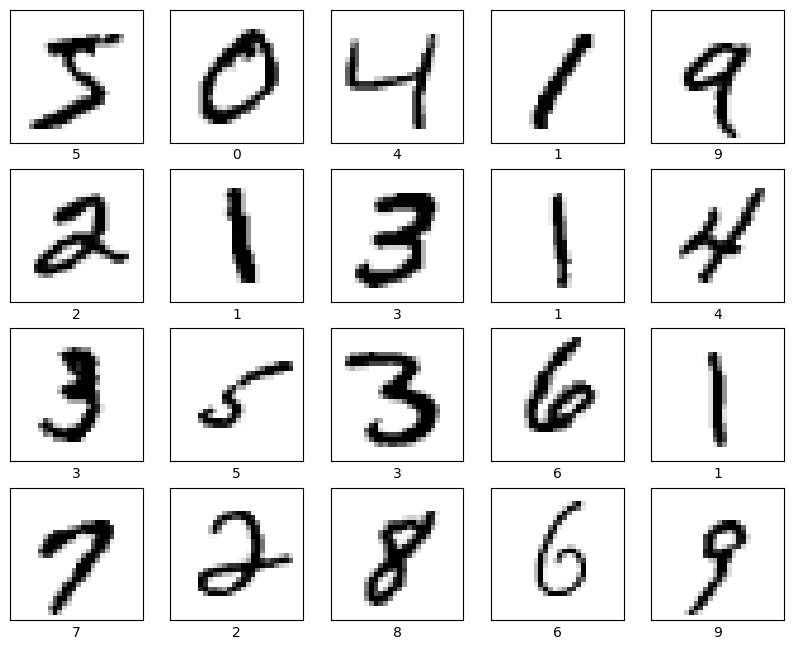

In [20]:
# Modified from source: https://www.tensorflow.org/tutorials/keras/classification
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [21]:
# A updated LeNet-5 architecture
# Modified from source: https://www.tensorflow.org/tutorials/images

model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))    

In [26]:
# Do a 10 fold cross validation
number_of_folds = 10
# Haperparameter used in the experiment
number_of_epochs = 10


# Perform the kfold
skf = StratifiedKFold(n_splits=number_of_folds)

for i, (train_index, val_index) in enumerate(skf.split(x_train, y_train)):
    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    
    x_val_fold = x_train[val_index]
    y_val_fold = y_train[val_index]
    
    
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train_fold, 
        y_train_fold, 
        epochs=number_of_epochs, 
        validation_data=(x_val_fold, y_val_fold)
    )

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 3s 3ms/step - loss: 0.1087 - accuracy: 0.9695 - val_loss: 0.0909 - val_accuracy: 0.9738


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 3)         78        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 3)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 3)           228       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 3)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [18]:
model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

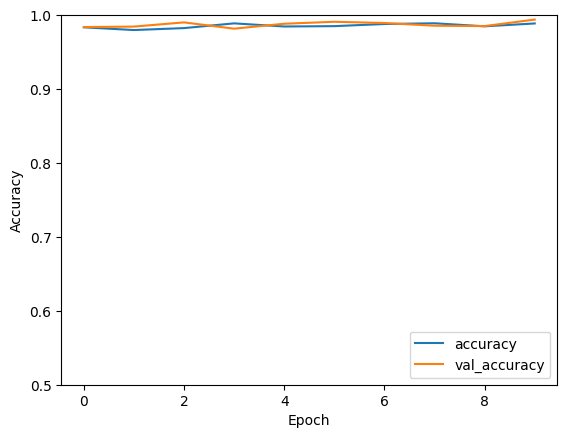

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [27]:
# Save the model to load in future
#model.save('LeNetTeacherModel')

INFO:tensorflow:Assets written to: LeNetTeacherModel\assets


INFO:tensorflow:Assets written to: LeNetTeacherModel\assets
